# Welcome to Tutorial 1!


---

####  **This tutorial shall explore the basics of [Episimmer](https://github.com/healthbadge/episimmer/tree/master) and running simple simulations.**




##### Let us perform some initialization. You can run this and head to the next section as the code here is not relevant to the Tutorial. (This may take a few minutes to run)

In [1]:
conda_path = ''
try:
    conda_path = !which conda
finally:
    print('')

if (len(conda_path) == 0):
    print('installing miniconda')
    !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local
    !conda update conda -y -q
    !source /usr/local/etc/profile.d/conda.sh
    !conda init 
    !conda install -n root _license -y -q
else:
    print('found miniconda')

conda_envs = !conda env list
res = [i for i in conda_envs if 'tutorial1' in i]
if (len(res) == 0):
    print('not found tutorial1 env', len(res))
    !conda create -y -q --name tutorial1 python=3.7
else:
    print('found tutorial1 env', len(res))


installing miniconda
--2022-04-25 10:10:31--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-04-25 10:10:31--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   148MB/s    in 0.4s    

2022-04-25 10:10:32 (148 MB/s) - ‘Minic

In [2]:
%%bash
source activate tutorial1

python
import sys

sys.path.append('/usr/local/lib/python3.7/site-packages')

In [3]:
!pip install episimmer
!git clone https://github.com/healthbadge/episimmer.git
%cd episimmer
from google.colab.patches import cv2, cv2_imshow
!pip install ipykernel

     |████████████████████████████████| 64 kB 1.8 MB/s 
     |████████████████████████████████| 1.9 MB 10.7 MB/s 
     |████████████████████████████████| 10.3 MB 46.0 MB/s 
     |████████████████████████████████| 15.7 MB 35.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 4.3 MB 47.3 MB/s 
     |████████████████████████████████| 98 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 49.5 MB/s 
     |████████████████████████████████| 247 kB 51.1 MB/s 
     |████████████████████████████████| 793 kB 57.1 MB/s 
     |████████████████████████████████| 132 kB 54.2 MB/s 
     |████████████████████████████████| 381 kB 48.5 MB/s 
     |████████████████████████████████| 102 kB 8.5 MB/s 
     |████████████████████████████████| 1.6 MB 33.5 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 61.6 MB/s 
     |████████████████████████████████| 100 kB 9.9 MB/s 


Cloning into 'episimmer'...
remote: Enumerating objects: 6497, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 6497 (delta 37), reused 41 (delta 16), pack-reused 6424
Receiving objects: 100% (6497/6497), 49.40 MiB | 34.55 MiB/s, done.
Resolving deltas: 100% (4406/4406), done.
/content/episimmer
     |████████████████████████████████| 131 kB 5.2 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 280 kB 43.3 MB/s 
     |████████████████████████████████| 1.8 MB 56.7 MB/s 
     |████████████████████████████████| 428 kB 71.2 MB/s 
     |████████████████████████████████| 130 kB 79.2 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 
     |████████████████████████████████| 1.1 MB 61.6 MB/s 


# Episimmer Introduction

---

## Environment


The basic components of Episimmer's environment are :

1. *Agents* : 
Agent form the core of the simulation. They represent the human population in the simulation that carries disease. They can have attributes like age, blood type, sex etc. In standard SIR models agents are assumed to be homogenous. 

2. *Individual Interactions* : An individual/simple interaction in Episimmer is the connecting interaction between two agents. If agents are the vertices of a graph, the interactions represent the edges. 

3. *Events* and *Locations* : Events are another type of interactions where they occur at a location. When you have a scenario with all agents interacting with each other, you should use Events. In graph terms, they represent a complete graph of Individual interactions. 

*Events and Interactions are periodic in nature. If you have 3 events and 15 timesteps, you will cycle through these 3 events 5 times.*

Additional components (derivatives) :

4. *Probabilistic Interactions* : Derivative of the individual interactions. Here, you can define a set of agents and a probability of interaction between two agents. Probabilistic Interactions are also periodic in nature.

5. *One time event* - Derivative of Events. A one-time event is an event that takes place on only specified time steps. Thus, no cycling of events takes place in one time events.


## Disease model


Disease models are used to model the spread of disease across agents in the environment. Agents are the disease carriers and all the different types of interactions present facilitate the spread of infection.

In Episimmer, There are two basic types of disease models -

1. *Stochastic Model* 

2. *Scheduled Model*

Both follow the [compartmental style of disease modelling](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) i.e. they have compartments or states that define the agent's disease state. They only differ by how they transition. Stochastic model allows us to implement compartmental models with probabilistic changes in state. For example, an infected agent can recover with a probability of 0.2. Scheduled models have transitions that are scheduled based on a distribution. For example in the real world an infected person might take on average 10 days with a variance of 2 days to recover i.e. $\mathcal{N}(\mu,\,\sigma^{2})$ where $\mu = 10$ and $\sigma^{2} = 2$.

**Note** : The platform’s simulations are not continuous as in, it does not solve the differential equations but simulates it out in discrete time steps using agents. As the time step becomes smaller and the number of agents increases the plot will tend towards a continuous one as produced by the equations.

# SIR Model

---

<img src="https://www.freecodecamp.org/news/content/images/2020/03/Screenshot-2020-03-30-at-01.23.52.png" alt="drawing" width="400"/>

SIR represents three states, namely, Susceptible, Infectious and Removed respectively. We shall consider 'R' to be Recovered. For each agent in the simulation, the transitions will be governed by probabilities of transitioning from one state to another.

We start with the basic stochastic SIR model occurring in a region for 1000 agents. 



We begin with a majority of the agents under the Susceptible state and a few of them in the Infectious state. We model a complete graph of agents such that all of them are connected. We use the 'Event' type of interaction such that all agents attend this event at a single location every time step.


Let us run the SIR model on Episimmer and view it's epidemic trajectory.

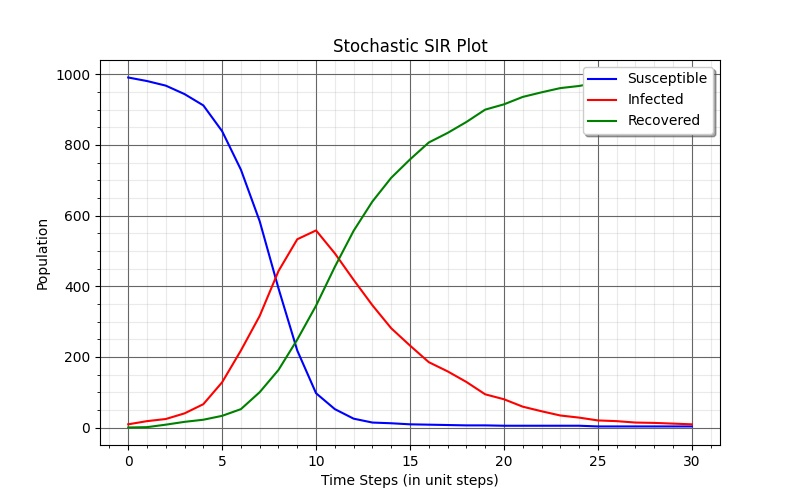

In [4]:
!python3 episimmer/main.py examples/Basic_Disease_Models/Stochastic_SIR -np
cv2_imshow(cv2.imread("examples/Basic_Disease_Models/Stochastic_SIR/results/results.jpg"))

The epidemic trajectory or time plot shows the evolution of the disease among the agents over a number of timesteps. As we can see, at the end of the simulation, all the agents have been infected at some point in time (almost all agents in the recovered state). This is because we have a highly connected set of agents and there is little chance for an agent to avoid the disease.

<br/>

Let us run another example which isn't as highly connected. This example has few agents at the moment so let us generate the environment according to our requirements. 

We require 1000 agents and sparse connections between the agents. Thus, we must use Individual Interactions to connect the agents rather than Events.

<br/>

$Number\ of\ Agents = 1000$

$Probability(connection\ between\ two\ agents) = 0.005$

$ \Rightarrow Number\ of\ interactions\ = \frac{1000 \times 999}{2} \times 0.005 \approx 2500$

<br/>


<br/>

**NOTE** : Interactions are less efficient compared to Events when we model a complete graph of interactions. Always use events if single interaction information isn't available.


In [5]:
# Copy contents from example to current directory for easy google colab use.
!cp -a examples/Interaction_Spaces/Stochastic_SIR_random_graph/. .

In [6]:
# python3 generate_files_csv.py Number_of_agents Probability_of_connection
# Try out your own number of agents and probability and run the next cell! 
# NOTE : Number of interactions scale with probability. Please keep that 
#        in mind before choosing your parameters and running the next cell

!python3 generate_files_csv.py 1000 0.005

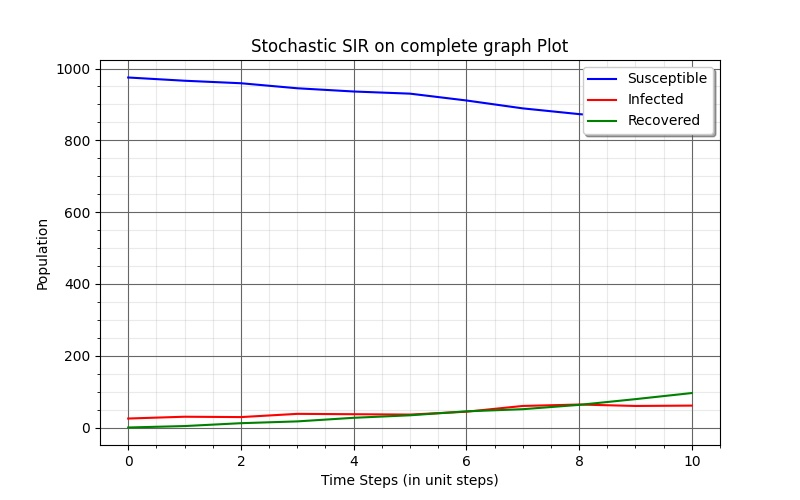

In [7]:
!python3 episimmer/main.py . -np
cv2_imshow(cv2.imread("results/results.jpg"))

Now, we see a slightly more realistic epidemic trajectory. Since our interconnecting network is sparse, we don't get such a severe disease spread like the previous example. You can play around with generating different number of agents and probability of connections and visualize the epidemic trajectory.

# Changes to the Simulation Configuration

---

The simulation's basic configuration is controlled by the config.txt file. A template of a config.txt file looks like this :


```
Random Seed <3>
Number of worlds <3>
Number of Days <30>
Agent Parameter Keys <Agent Index:Type:Residence:HLA Type>
Agent list filename <agents.csv>
Interaction Info Keys <Agent Index:Interacting Agent Index:Time Interval:Intensity>
Interaction Files list filename <interaction_files_list.txt>
Probabilistic Interaction Files list filename <>
Location Parameter Keys <Location Index:Type:Ventilation:Roomsize:Capacity>
Location list filename <locations.txt>
Event Parameter Keys <Location Index:Agents:Time Interval>
Event Files list filename <event_files_list.txt>
One Time Event filename <>
```

For now we shall focus on only the first three parameters of the simulation. These basic simulation parameters are random seed, number of worlds and the number of days. Random seed refers to initializing the random number generator. When initialized with the same value, you get deterministic outputs. Number of worlds refers to the number of independent simulations to average over. Number of days refer to the number of timesteps to run a single world. 

Let us use an example to show their differences and change these parameters with some useful scripts already present in the repository.

In [8]:
def read_file(file_name):
  with open(file_name) as f:
    print(f.read())

In [9]:
# Current config.txt
read_file('config.txt')

Random Seed <3>
Number of worlds <1>
Number of Days <10>
Agent Parameter Keys <Agent Index>
Agent list filename <agents.csv>
Interaction Info Keys <Agent Index:Interacting Agent Index>
Interaction Files list filename <interaction_files_list.txt>
Probabilistic Interaction Files list filename <>
Location Parameter Keys <Location Index>
Location list filename <locations.txt>
Event Parameter Keys <>
Event Files list filename <>
One Time Event filename <>



In [10]:
!python3 scripts/generate_examples/config.py --fromfile config.txt -rs 4 -nw 3 -nd 50
read_file('config.txt')

Random Seed <4>
Number of worlds <3>
Number of Days <50>
Agent Parameter Keys <Agent Index>
Agent list filename <agents.csv>
Interaction Info Keys <Agent Index:Interacting Agent Index>
Interaction Files list filename <interaction_files_list.txt>
Probabilistic Interaction Files list filename <>
Location Parameter Keys <Location Index>
Location list filename <locations.txt>
Event Parameter Keys <>
Event Files list filename <>
One Time Event filename <>



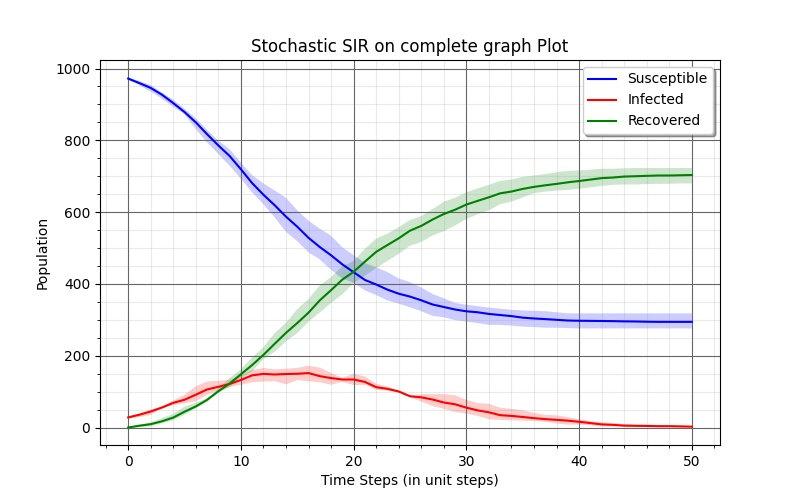

In [11]:
!python3 episimmer/main.py . -np
cv2_imshow(cv2.imread("results/results.jpg"))

### Disclaimer : These colab tutorials are only for reference and they are in no way representative of the entire functionality of Episimmer. Please look at the [Documentation](https://episimmer.readthedocs.io/en/latest/) for more details.